# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | al bahah
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | kingston
Processing Record 8 of Set 1 | lihue
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | mili
Processing Record 11 of Set 1 | ban phai
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | astrakhan
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | valparaiso
Processing Record 16 of Set 1 | saipan
Processing Record 17 of Set 1 | ha tien
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | susuman
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | conduaga
Processi

Processing Record 40 of Set 4 | uturoa
Processing Record 41 of Set 4 | hammerfest
Processing Record 42 of Set 4 | syktyvkar
Processing Record 43 of Set 4 | shimoda
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | casteljaloux
Processing Record 46 of Set 4 | copala
Processing Record 47 of Set 4 | sao joao da barra
Processing Record 48 of Set 4 | holualoa
Processing Record 49 of Set 4 | shalqar
Processing Record 0 of Set 5 | fort madison
Processing Record 1 of Set 5 | hinthada
Processing Record 2 of Set 5 | nogliki
Processing Record 3 of Set 5 | ust-nera
Processing Record 4 of Set 5 | vanino
Processing Record 5 of Set 5 | pitea
Processing Record 6 of Set 5 | labrador city
Processing Record 7 of Set 5 | shache
Processing Record 8 of Set 5 | aykhal
Processing Record 9 of Set 5 | santa terezinha
Processing Record 10 of Set 5 | galveston
Processing Record 11 of Set 5 | chibougamau
Processing Record 12 of Set 5 | callao
Processing Record 13 of Set 5 | sur
Processing Reco

Processing Record 32 of Set 8 | geiro
Processing Record 33 of Set 8 | uusikaupunki
Processing Record 34 of Set 8 | east ballina
Processing Record 35 of Set 8 | montepuez
Processing Record 36 of Set 8 | gueltat zemmour
City not found. Skipping...
Processing Record 37 of Set 8 | peterhead
Processing Record 38 of Set 8 | horta
Processing Record 39 of Set 8 | sangmelima
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | barroquinha
Processing Record 42 of Set 8 | tazovsky
Processing Record 43 of Set 8 | lashio
Processing Record 44 of Set 8 | valdivia
Processing Record 45 of Set 8 | middelburg
Processing Record 46 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 47 of Set 8 | boende
Processing Record 48 of Set 8 | tamanrasset
Processing Record 49 of Set 8 | zabol
Processing Record 0 of Set 9 | gananoque
Processing Record 1 of Set 9 | vuktyl
Processing Record 2 of Set 9 | maceio
Processing Record 3 of Set 9 | yeniseysk
Processing Record 4 of Set 9 | 

Processing Record 19 of Set 12 | amurzet
Processing Record 20 of Set 12 | koutiala
Processing Record 21 of Set 12 | mogadishu
Processing Record 22 of Set 12 | manbij
Processing Record 23 of Set 12 | sigli
Processing Record 24 of Set 12 | ambalangoda
Processing Record 25 of Set 12 | sagua la grande
Processing Record 26 of Set 12 | kota belud
Processing Record 27 of Set 12 | fiambala
Processing Record 28 of Set 12 | katsuren-haebaru
Processing Record 29 of Set 12 | bich'vinta
Processing Record 30 of Set 12 | rozavlea
Processing Record 31 of Set 12 | am djarass
City not found. Skipping...
Processing Record 32 of Set 12 | jizzax
Processing Record 33 of Set 12 | sisa
Processing Record 34 of Set 12 | aoulef
Processing Record 35 of Set 12 | cidreira
Processing Record 36 of Set 12 | dodge city
-----------------------------
Data Retrieval Complete      
-----------------------------


In [24]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -100.0171, 'lat': 37.7528},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 288.65,
  'feels_like': 287.38,
  'temp_min': 287.16,
  'temp_max': 289.29,
  'pressure': 1021,
  'humidity': 43},
 'visibility': 10000,
 'wind': {'speed': 7.2, 'deg': 210},
 'clouds': {'all': 0},
 'dt': 1699742966,
 'sys': {'type': 2,
  'id': 2003824,
  'country': 'US',
  'sunrise': 1699708549,
  'sunset': 1699745548},
 'timezone': -21600,
 'id': 5445298,
 'name': 'Dodge City',
 'cod': 200}

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.9769,-114.0611,296.64,30,0,5.67,MX,1699742806
1,iqaluit,63.7506,-68.5145,263.00,79,75,3.60,CA,1699742866
2,puerto natales,-51.7236,-72.4875,278.95,58,62,4.43,CL,1699742866
3,al bahah,20.0129,41.4677,285.83,40,0,3.41,SA,1699742866
4,bilibino,68.0546,166.4372,242.87,99,23,2.00,RU,1699742866


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,296.64,30,0,5.67,MX,1699742806
1,iqaluit,63.7506,-68.5145,263.00,79,75,3.60,CA,1699742866
2,puerto natales,-51.7236,-72.4875,278.95,58,62,4.43,CL,1699742866
3,al bahah,20.0129,41.4677,285.83,40,0,3.41,SA,1699742866
4,bilibino,68.0546,166.4372,242.87,99,23,2.00,RU,1699742866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

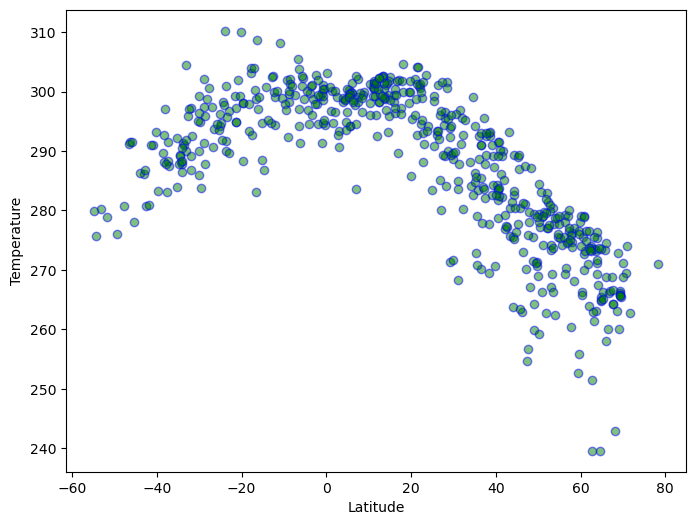

In [36]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="green", edgecolors="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

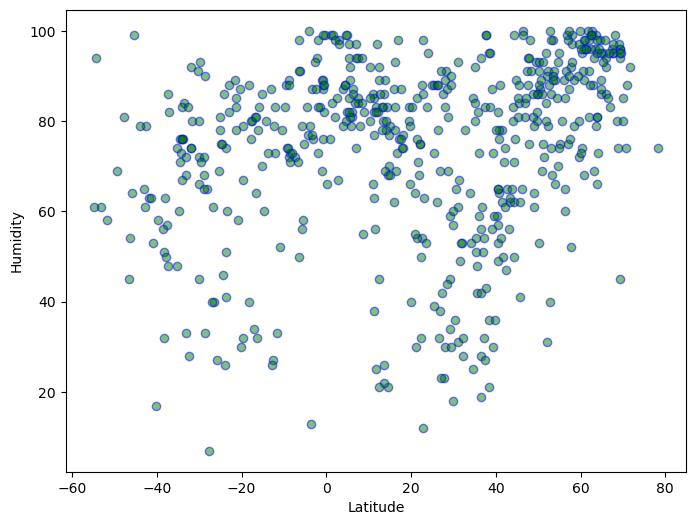

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="green", edgecolors="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

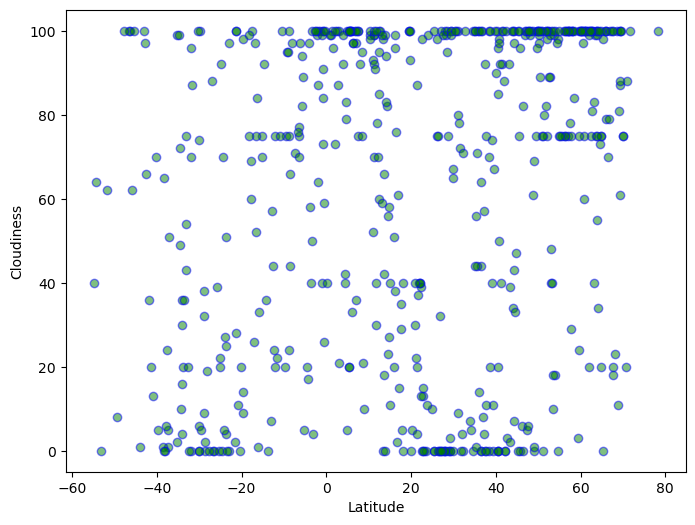

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="green", edgecolors="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

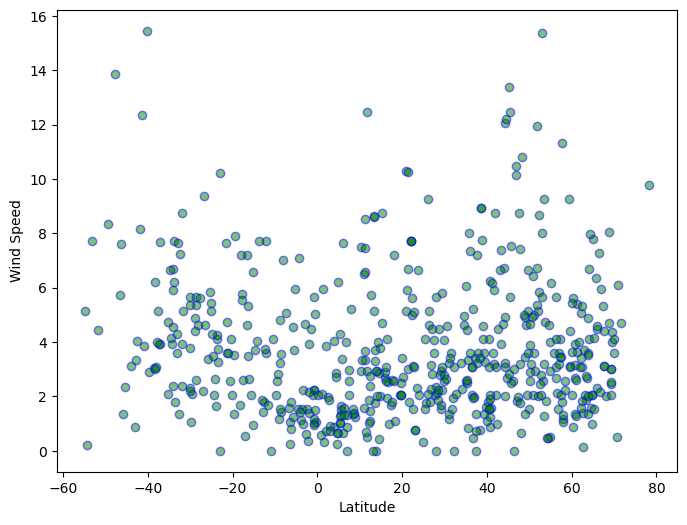

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="green", edgecolors="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


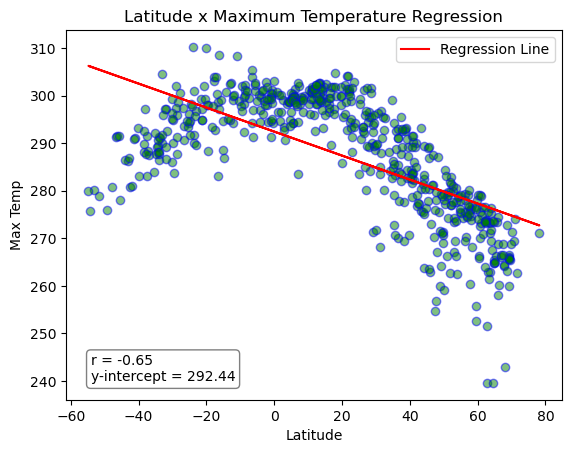

In [75]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, xlabel, ylabel, title):
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    predicted_values = intercept + slope * x
    
    plt.scatter(x, y, c="green", edgecolors="blue", alpha=0.5)
    
    plt.plot(x, predicted_values, color='red', label='Regression Line')
    
    plt.annotate(f'r = {r_value:.2f}\ny-intercept = {intercept:.2f}',
                 xy=(0.05, 0.05), xycoords='axes fraction', fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white'))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.legend()
    
linear_regression_plot(city_data_df['Lat'], city_data_df['Max Temp'], "Latitude", 'Max Temp', "Latitude x Maximum Temperature Regression")
plt.show()

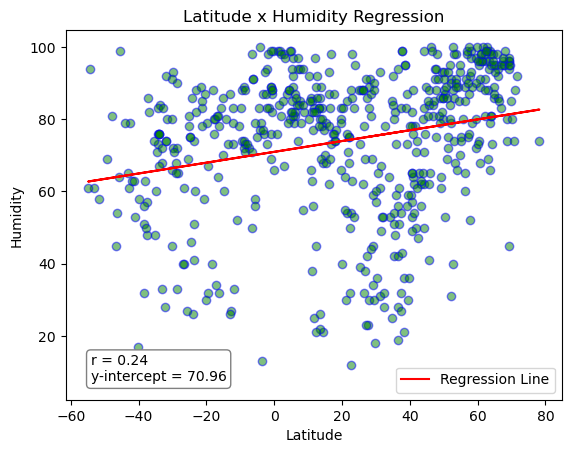

In [76]:
linear_regression_plot(city_data_df['Lat'], city_data_df['Humidity'], "Latitude", 'Humidity', "Latitude x Humidity Regression")
plt.show()

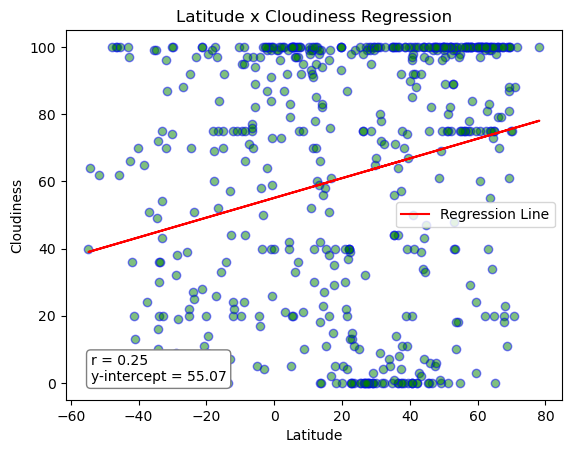

In [77]:
linear_regression_plot(city_data_df['Lat'], city_data_df['Cloudiness'], 'Latitude', 'Cloudiness','Latitude x Cloudiness Regression')
plt.show()

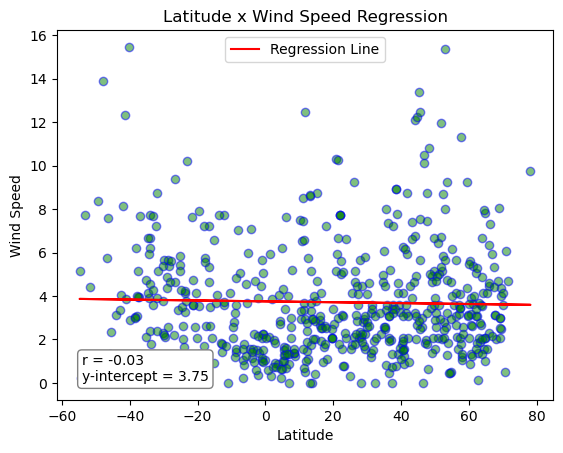

In [78]:
linear_regression_plot(city_data_df['Lat'], city_data_df['Wind Speed'], 'Latitude', 'Wind Speed','Latitude x Wind Speed Regression')
plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,296.64,30,0,5.67,MX,1699742806
1,iqaluit,63.7506,-68.5145,263.00,79,75,3.60,CA,1699742866
3,al bahah,20.0129,41.4677,285.83,40,0,3.41,SA,1699742866
4,bilibino,68.0546,166.4372,242.87,99,23,2.00,RU,1699742866
6,kingston,17.9970,-76.7936,304.68,74,40,7.20,JM,1699742866


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,278.95,58,62,4.43,CL,1699742866
5,blackmans bay,-43.0167,147.3167,286.22,65,100,0.89,AU,1699742866
8,grytviken,-54.2811,-36.5092,275.63,94,64,0.22,GS,1699742478
11,port-aux-francais,-49.3500,70.2167,275.96,69,8,8.35,TF,1699742867
13,saint-pierre,-21.3393,55.4781,294.97,83,100,3.60,RE,1699742800


###  Temperature vs. Latitude Linear Regression Plot

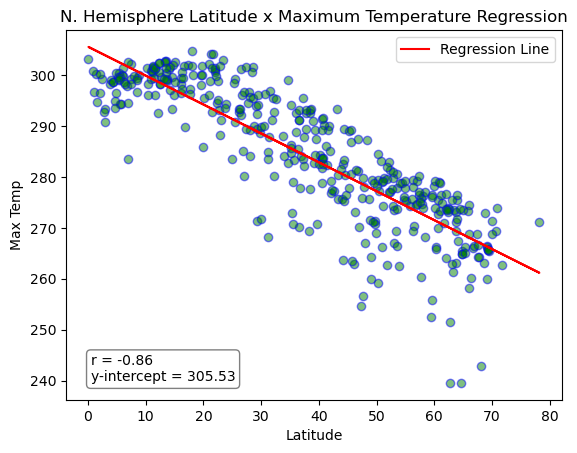

In [80]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", 'Max Temp', "N. Hemisphere Latitude x Maximum Temperature Regression")
plt.show()

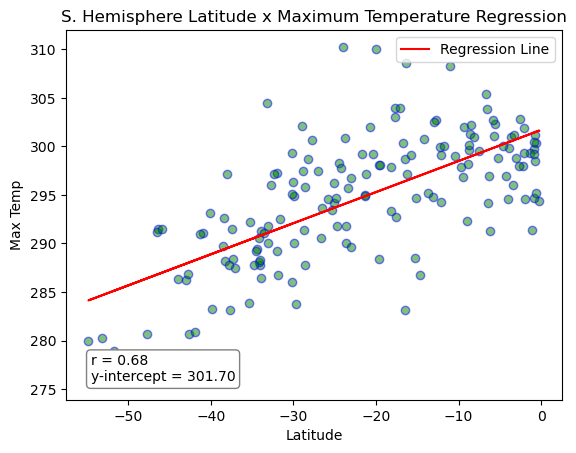

In [82]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", 'Max Temp', "S. Hemisphere Latitude x Maximum Temperature Regression")
plt.show()

**Discussion about the linear relationship:** As would be expected when moving away from the equator, the northern hemisphere chart shows a strong predictability that the higher the latitude the lower the maximum temperature (r= .86) while in the southern hemisphere the opposite is true. A different trend is seen in the southern hemisphere where the higher one get in latitude the higher the temperature is, with slightly lower predictive power (r=68).

### Humidity vs. Latitude Linear Regression Plot

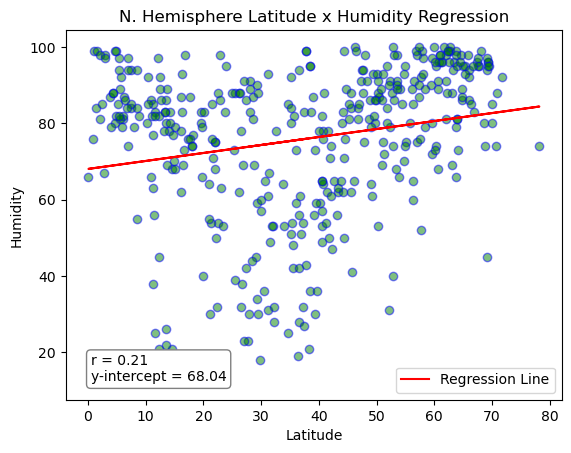

In [83]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", 'Humidity', "N. Hemisphere Latitude x Humidity Regression")
plt.show()

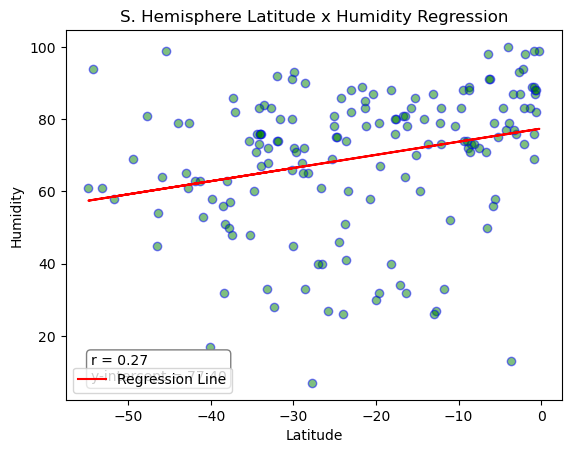

In [90]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", 'Humidity', "S. Hemisphere Latitude x Humidity Regression")
plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemisphere one can expect the humidity level to rise slightly when moving from lower to higher latitudes. There is quite a bit of variability in humidity though when plotted in relation to latitude so neither model is very strong in terms of predictability (r = .21 and r = .27, respectively).

### Cloudiness vs. Latitude Linear Regression Plot

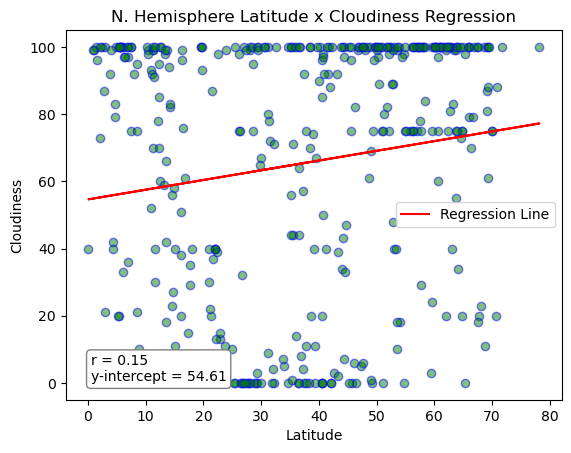

In [86]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", 'Cloudiness', "N. Hemisphere Latitude x Cloudiness Regression")
plt.show()

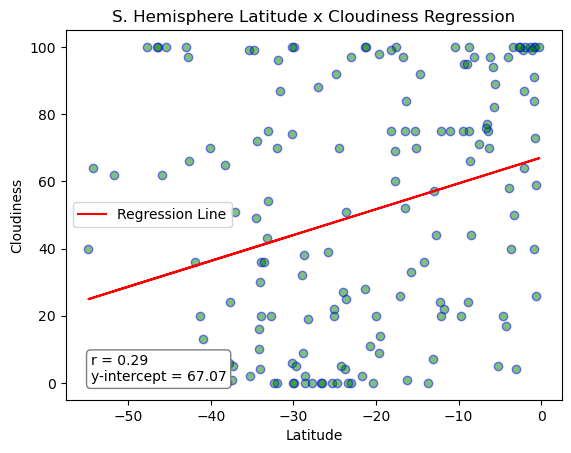

In [87]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", 'Cloudiness', "S. Hemisphere Latitude x Cloudiness Regression")
plt.show()

**Discussion about the linear relationship:** Cloudiness seems to be a bimodal factor in both the northern and southern hemisphere with many data points clustering at the peak of cloudiness and many clustering at the lowest value of cloudiness. While both models are quite weak in terms of predictive values there is a higher liklihood of experiencing cloudiness as the latitude increases, regardless of hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

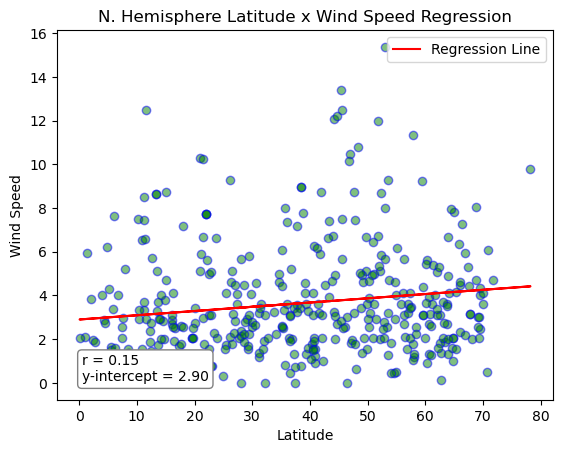

In [88]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", 'Wind Speed', "N. Hemisphere Latitude x Wind Speed Regression")
plt.show()

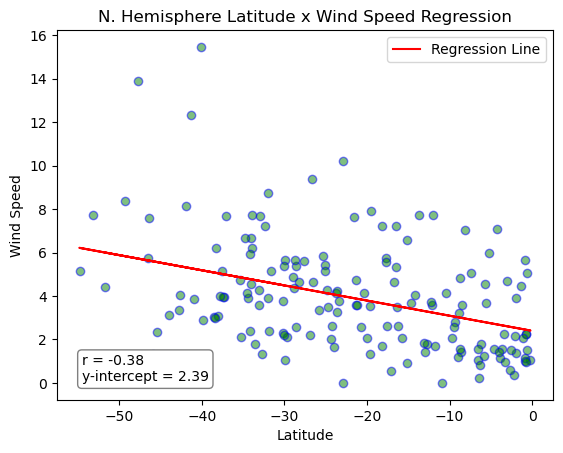

In [89]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", 'Wind Speed', "N. Hemisphere Latitude x Wind Speed Regression")
plt.show()

**Discussion about the linear relationship:** In terms of the northern hemisphere, one would be slightly more likely to experience higher wind speeds, the higher they are in latitude. The opposite, again, is true in the southern hemisphere with a slightly higher likelihood to experience lower wind speeds the higher the latitude. The majority of cities will experience wind speed in the bottom quartile of possible wind speeds, regardless of hemisphere. Neither of these models fit the data very well, with relatively low r values (r = .15 and r = .38) 